<a href="https://www.kaggle.com/code/ahmedelsayed24/stockx-yeezy-vs-off-white?scriptVersionId=146284170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv('/kaggle/input/stockx/StockX-Data-Contest-2019-3.csv')
df =pd.DataFrame(data)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [2]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

# Data Cleaning

In [3]:
#change datatypes

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sale Price'] = df['Sale Price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Retail Price'] = df['Retail Price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Release Date'] = pd.to_datetime(df['Release Date'])
df.dtypes


/tmp/ipykernel_20/512429323.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipykernel_20/512429323.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price             float64
Retail Price           float64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object

In [4]:
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-', ' '))
df['Profit Margin'] = (df['Sale Price'] - df['Retail Price']) / df['Retail Price']



df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097.0,220.0,2016-09-24,11.0,California,3.986364
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685.0,220.0,2016-11-23,11.0,California,2.113636
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690.0,220.0,2016-11-23,11.0,California,2.136364
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075.0,220.0,2016-11-23,11.5,Kentucky,3.886364
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828.0,220.0,2017-02-11,11.0,Rhode Island,2.763636


# EDA

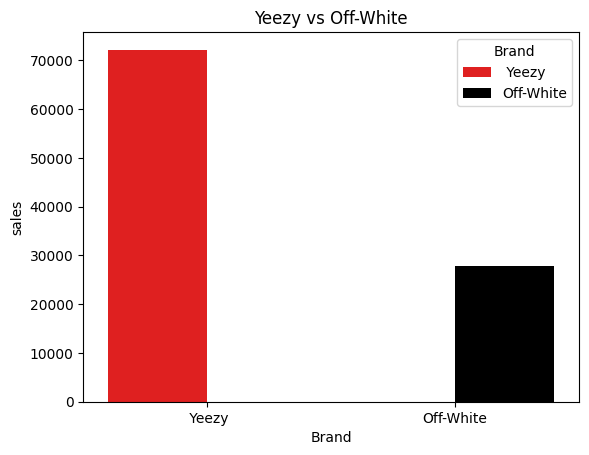

In [5]:
#What shoes are most popular? 

palette = {' Yeezy': 'red', 'Off-White': 'black'}

sns.countplot(x='Brand',data=df,hue='Brand',palette=palette)
plt.ylabel('sales')
plt.title('Yeezy vs Off-White')
plt.show()


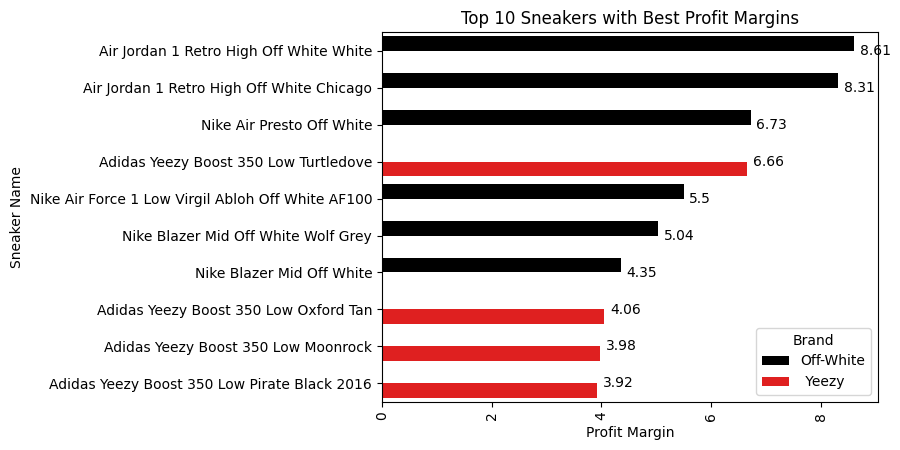

In [6]:
#Which shoes have the best profit margins?

shoes_profit = df.groupby(['Sneaker Name','Brand'])['Profit Margin'].mean().reset_index()
shoes_profit_sorted = shoes_profit.sort_values('Profit Margin', ascending=False)
top_10_sneakers = shoes_profit_sorted.head(10)

palette = {' Yeezy': 'red', 'Off-White': 'black'}


sns.barplot(data=top_10_sneakers, y='Sneaker Name', x='Profit Margin', hue='Brand',palette=palette)
plt.ylabel('Sneaker Name')
plt.xlabel('Profit Margin')
plt.title('Top 10 Sneakers with Best Profit Margins')
plt.xticks(rotation=90)

for i, v in enumerate(top_10_sneakers['Profit Margin']):
    plt.text(v + 0.1 , i, str(round(v, 2)), ha='left', va='center')
plt.show()

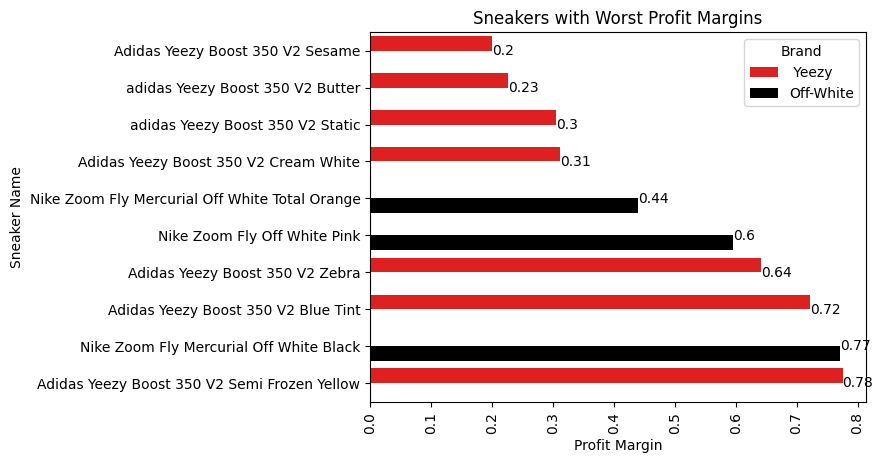

In [7]:
#Which shoes have the worst profit margins?

shoes_profit = df.groupby(['Sneaker Name','Brand'])['Profit Margin'].mean().reset_index()
shoes_profit_sorted = shoes_profit.sort_values('Profit Margin', ascending=True)
Worst_10_sneakers = shoes_profit_sorted.head(10)
palette = {' Yeezy': 'red', 'Off-White': 'black'}
sns.barplot(data=Worst_10_sneakers, y='Sneaker Name', x='Profit Margin', hue='Brand',palette=palette)
plt.ylabel('Sneaker Name')
plt.xlabel('Profit Margin')
plt.title('Sneakers with Worst Profit Margins')
plt.xticks(rotation=90)

for i, v in enumerate(Worst_10_sneakers['Profit Margin']):
    plt.text(v  , i, str(round(v, 2)), ha='left', va='center')
plt.show() 

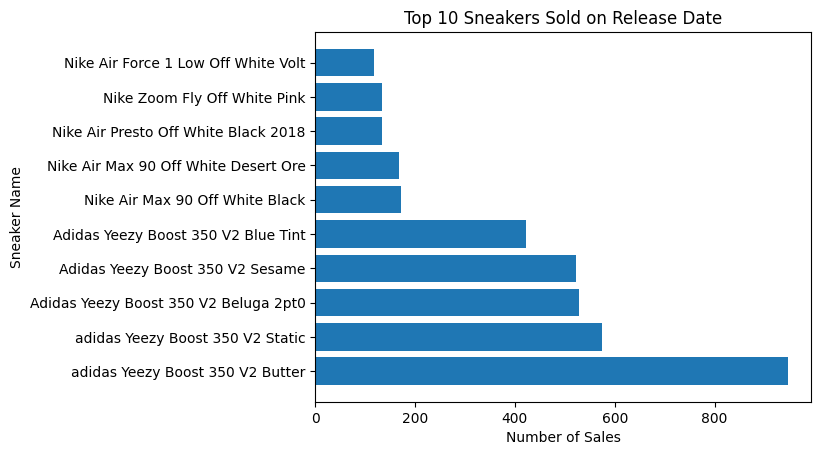

In [8]:
#top 10 hypest sneakers 

import matplotlib.pyplot as plt

top_10 = df[df['Order Date'] == df['Release Date']]['Sneaker Name'].value_counts().head(10)
plt.barh(top_10.index, top_10.values)
plt.title('Top 10 Sneakers Sold on Release Date')
plt.xlabel('Number of Sales')
plt.ylabel('Sneaker Name')
plt.show()


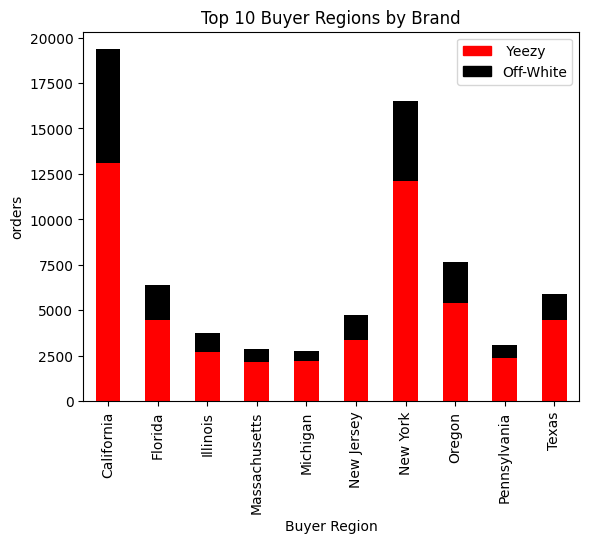

In [9]:
#region
palette = {' Yeezy': 'red', 'Off-White': 'black'}
top10_regions = df['Buyer Region'].value_counts().nlargest(10).index
df_top10 = df[df['Buyer Region'].isin(top10_regions)]
pivot_table = df_top10.pivot_table(index='Buyer Region', columns='Brand', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, color=palette.values())
handles = [plt.Rectangle((0,0),1,1, color=color) for color in palette.values()]
labels = palette.keys()
plt.legend(handles, labels)
plt.xticks(rotation=90)
plt.ylabel('orders')
plt.title('Top 10 Buyer Regions by Brand')
plt.show()

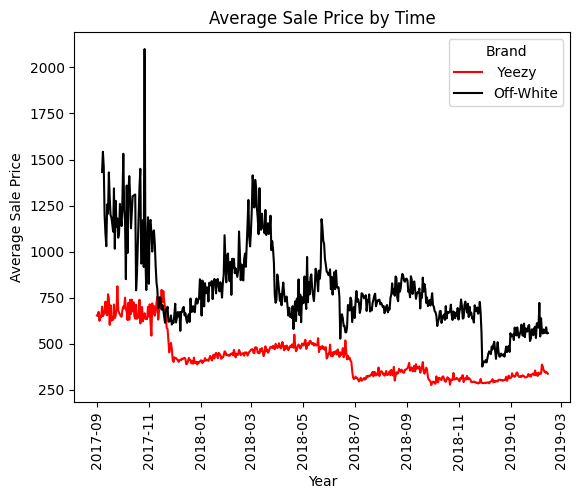

In [10]:
#sale price over time
df_avg = df.groupby(['Order Date', 'Brand'])['Sale Price'].mean().reset_index()
palette = {' Yeezy': 'red', 'Off-White': 'black'}
sns.lineplot(data=df_avg, x='Order Date', y='Sale Price', hue='Brand',palette=palette)
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90)
plt.title('Average Sale Price by Time')

plt.show()

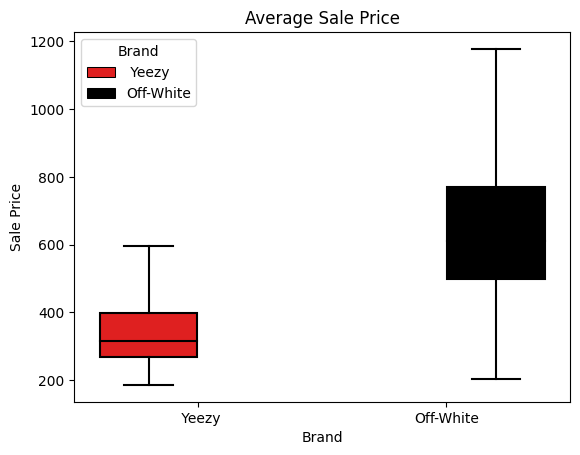

In [11]:
# How does the average sale price of Yeezy shoes compare to Off-White shoes?

palette = {' Yeezy': 'red', 'Off-White': 'black'}
sns.boxplot(x='Brand', y='Sale Price', hue='Brand', palette=palette, data=df, showfliers=False)
plt.title('Average Sale Price')
plt.show()

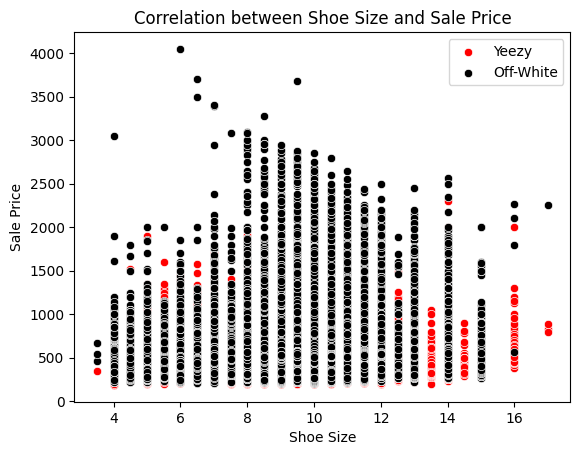

Correlation coefficient for Yeezy: 0.06613336865443198
Correlation coefficient for Off-White: 0.045852268239328295


In [12]:
#Is there a correlation between shoe size and sale price for Yeezy and Off-White shoes?
yeezy_data = df[df['Brand'] == ' Yeezy']
off_white_data = df[df['Brand'] == 'Off-White']

sns.scatterplot(x='Shoe Size', y='Sale Price', data=yeezy_data, label='Yeezy',color='red')
sns.scatterplot(x='Shoe Size', y='Sale Price', data=off_white_data, label='Off-White',color='black')

plt.title('Correlation between Shoe Size and Sale Price')
plt.xlabel('Shoe Size')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

yeezy_corr = yeezy_data['Shoe Size'].corr(yeezy_data['Sale Price'])
off_white_corr = off_white_data['Shoe Size'].corr(off_white_data['Sale Price'])

print("Correlation coefficient for Yeezy:", yeezy_corr)
print("Correlation coefficient for Off-White:", off_white_corr)


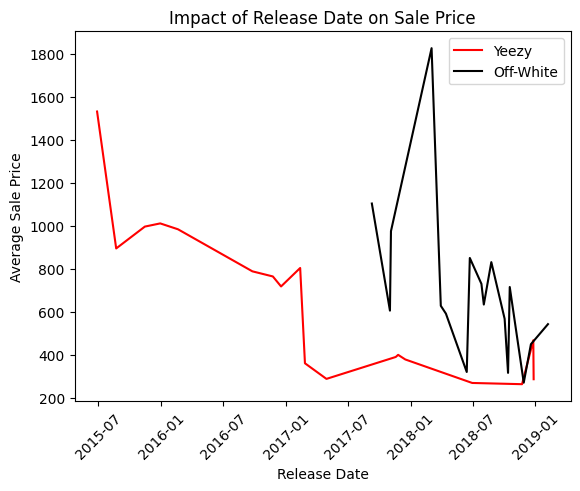

In [13]:
#How does the release date impact the sale price of Yeezy and Off-White shoes?
yeezy_avg_price_by_date = df[df['Brand'] == ' Yeezy'].groupby('Release Date')['Sale Price'].mean()
off_white_avg_price_by_date = df[df['Brand'] == 'Off-White'].groupby('Release Date')['Sale Price'].mean()

plt.plot(yeezy_avg_price_by_date.index, yeezy_avg_price_by_date.values, label='Yeezy',color='red')
plt.plot(off_white_avg_price_by_date.index, off_white_avg_price_by_date.values, label='Off-White',color='black')
plt.title('Impact of Release Date on Sale Price')
plt.xlabel('Release Date')
plt.ylabel('Average Sale Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_20/1463320974.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


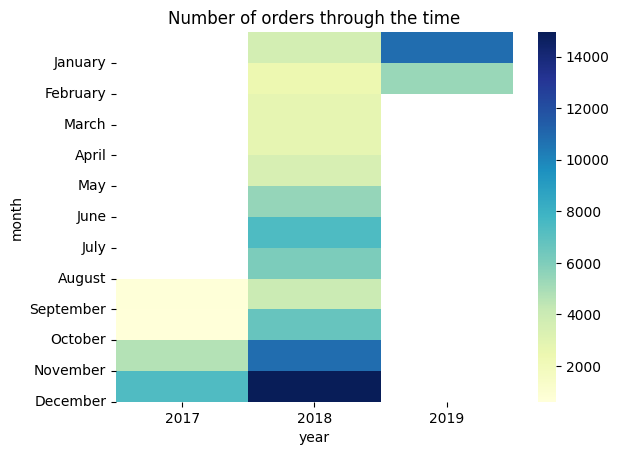

In [14]:
#Number of orders through the time
data['Order Date'] = pd.to_datetime(data['Order Date'])
df['month'] = data['Order Date'].dt.month
df['year'] = data['Order Date'].dt.year

shows = df.pivot_table(index="month", columns="year", values="Brand", aggfunc='size')
sns.heatmap(shows, cmap="YlGnBu", annot=False)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.yticks(ticks=range(1, 13), labels=month_order, rotation=0)
plt.title('Number of orders through the time')
plt.show()